In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Lasso
from math import sqrt
import pickle as pkl
from sklearn.linear_model import Lasso



plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)

In [2]:

m_feature = pkl.load(open('m_feature.pkl','rb'))
p_feature = pkl.load(open('p_feature.pkl','rb'))


# original data set for math class
m_orig = pd.read_csv('MathClassOriginal.csv')
m_orig = m_orig.drop('Unnamed: 0',axis =1)

# original dataset for language arts class
p_orig = pd.read_csv('PortugeseClassOriginal.csv')
p_orig = p_orig.drop('Unnamed: 0',axis =1)

m = pd.read_csv('MathClassCleaned.csv')
m = m.drop(columns='Unnamed: 0')

p = pd.read_csv('PortugeseClassCleaned.csv')
p = p.drop(columns='Unnamed: 0')

p_target=p.G3
m_target = m.G3

p_dummy = p_feature
p_dummy['G3'] = p.G3

m_dummy = m_feature
m_dummy['G3'] = m.G3

PortTarget = p_dummy['G3']
MathTarget = m_dummy['G3']


p_feats = p_feature.drop(columns = ['G3','school_MS'])
m_feats = m_feature.drop(columns = ['G3','school_MS'])

feats = pd.concat([p_dummy,m_dummy])
GeneralTarget = feats['G3']
feats = feats.drop(columns = ['G3','school_MS','failures'])

In [3]:
PortInteraction = PolynomialFeatures(
    degree=6
    ,interaction_only = True
    ,include_bias=False
                           )
PortInteraction_data = PortInteraction.fit_transform(
    p_feats
)
PortInteractionColumns = PortInteraction.get_feature_names(
    p_feats.columns
)
DFPortInteraction = pd.DataFrame(
    PortInteraction_data
    , columns=PortInteractionColumns
)
DFPortInteraction.shape

(649, 2835199)

In [4]:
MathInteraction = PolynomialFeatures(
    degree=6
    ,interaction_only = True
    ,include_bias=False
                           )
MathInteraction_data = MathInteraction.fit_transform(
    m_feats
)
MathInteractionColumns = MathInteraction.get_feature_names(
    m_feats.columns
)
DFMathInteraction = pd.DataFrame(
    MathInteraction_data
    , columns = MathInteractionColumns
)
DFMathInteraction.shape

(395, 2835199)

In [5]:
PickedFeatures = ['Medu' , 'Fedu'
                  , 'studytime', 'higher' 
                  , "super" ]

PickedPortDf = p_dummy[ PickedFeatures ]
PickedMathDf = m_dummy[ PickedFeatures ]
PickedGeneralDf = feats[ PickedFeatures ]

In [6]:
PickedPortFeatureXTrain, PickedPortFeatureXTest, PickedPortFeatureYTrain, PickedPortFeatureYTest = train_test_split(
    PickedPortDf, PortTarget
    ,test_size=0.2
)
                

In [7]:
PortPickedScaler = StandardScaler()

# fit the scaler to the training data
PortPickedScaler.fit(PickedPortFeatureXTrain)

#transform the training data
PickedPortFeatureXTrain = pd.DataFrame(
    data=PortPickedScaler.transform
    (
    PickedPortFeatureXTrain
    )
    , columns=PickedPortDf.columns
)

#transform the testing dat
PickedPortFeatureXTest = pd.DataFrame(
    data=PortPickedScaler.transform
    (
        PickedPortFeatureXTest
    )
    , columns=PickedPortDf.columns
)




In [8]:
#instantiate a linear regression object

LinearModelOnPortPickedFeatures = LinearRegression()

#fit the linear regression to the data
LinearModelOnPortPickedFeatures = LinearModelOnPortPickedFeatures.fit(
    PickedPortFeatureXTrain,
    PickedPortFeatureYTrain
)

PortPickedYTrainPredictions = LinearModelOnPortPickedFeatures.predict(
    PickedPortFeatureXTrain
)

PortPickedTrainRMSE = np.sqrt(
    metrics.mean_squared_error(
        PickedPortFeatureYTrain
        , PortPickedYTrainPredictions
    )
)


print('Training Root Mean Squared Error:' 
      , PortPickedTrainRMSE
     )


Training Root Mean Squared Error: 3.0293878961299985


In [9]:
PortPickedYTestPredictions = LinearModelOnPortPickedFeatures.predict(
    PickedPortFeatureXTest
)

#evaluate the predictions on the test examples
PortPickedTestRMSE = np.sqrt(
    metrics.mean_squared_error(
    PickedPortFeatureYTest,
    PortPickedYTestPredictions
)
                   )

print('Testing Root Mean Squared Error:' 
      , PortPickedTestRMSE)


print('Training: ', PortPickedTrainRMSE
      ,"vs. Testing: ", PortPickedTestRMSE)




Testing Root Mean Squared Error: 2.492164920110774
Training:  3.0293878961299985 vs. Testing:  2.492164920110774


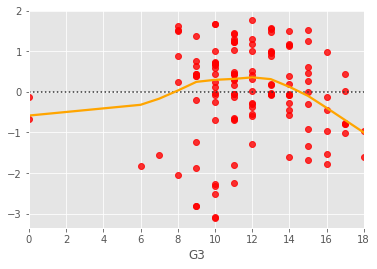

In [10]:
sns.residplot( 
    PickedPortFeatureYTest
    , PortPickedYTestPredictions
    ,lowess=True
    , color="red"
    ,line_kws={'color':'orange'}
)

In [11]:
PickedMathFeatureXTrain, PickedMathFeatureXTest, PickedMathFeatureYTrain, PickedMathFeatureYTest = train_test_split(
    PickedMathDf, MathTarget
    ,test_size=0.2
)
               

In [12]:
MathPickedScaler = StandardScaler()

# fit the scaler to the training data
MathPickedScaler.fit(PickedMathFeatureXTrain)

#transform the training data
PickedMathFeatureXTrain = pd.DataFrame(
    data=MathPickedScaler.transform
    (
    PickedMathFeatureXTrain
    )
    , columns=PickedMathDf.columns
)

#transform the testing dat
PickedMathFeatureXTest = pd.DataFrame(
    data=MathPickedScaler.transform
    (
        PickedMathFeatureXTest
    )
    , columns=PickedPortDf.columns
)




In [13]:
#instantiate a linear regression object
LinearModelOnMathPickedFeatures = LinearRegression()

#fit the linear regression to the data
LinearModelOnMathPickedFeatures = LinearModelOnMathPickedFeatures.fit(
    PickedMathFeatureXTrain,
    PickedMathFeatureYTrain
)

MathPickedYTrainPredictions = LinearModelOnMathPickedFeatures.predict(
    PickedMathFeatureXTrain
)

MathPickedTrainRMSE = np.sqrt(
    metrics.mean_squared_error(
        PickedMathFeatureYTrain
        , MathPickedYTrainPredictions
    )
)


print('Training Root Mean Squared Error:' 
      , MathPickedTrainRMSE
     )


Training Root Mean Squared Error: 4.506102321749769


In [14]:
MathPickedYTestPredictions = LinearModelOnMathPickedFeatures.predict(
    PickedMathFeatureXTest
)

#evaluate the predictions on the test examples
MathPickedTestRMSE = np.sqrt(
    metrics.mean_squared_error(
    PickedMathFeatureYTest,
    MathPickedYTestPredictions
)
                   )

print('Testing Root Mean Squared Error:' 
      , MathPickedTestRMSE)


print('Training: ', MathPickedTrainRMSE
      ,"vs. Testing: ", MathPickedTestRMSE)



Testing Root Mean Squared Error: 4.014734076118019
Training:  4.506102321749769 vs. Testing:  4.014734076118019


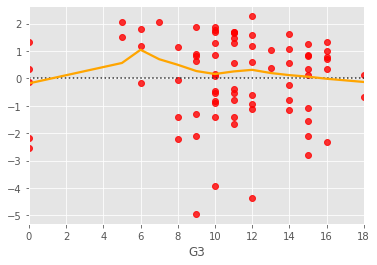

In [15]:
sns.residplot( 
    PickedMathFeatureYTest
    , MathPickedYTestPredictions
    ,lowess=True
    , color="red"
    ,line_kws={'color':'orange'}
)

In [16]:
InteractedPortFeatureXTrain, InteractedPortFeatureXTest, InteractedPortFeatureYTrain, InteractedPortFeatureYTest = train_test_split(
    DFPortInteraction, PortTarget
    ,test_size=0.2
)

In [17]:
PortInteractionSelector = SelectKBest(
    f_regression
    , k=25
)

PortInteractionSelector.fit(
    InteractedPortFeatureXTrain
    , InteractedPortFeatureYTrain
)
PortInteractionSelectorSelectedColumns = InteractedPortFeatureXTrain.columns[
    PortInteractionSelector.get_support()
]
list(PortInteractionSelectorSelectedColumns)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


['failures',
 'Medu higher',
 'studytime failures',
 'studytime higher',
 'failures famrel',
 'failures freetime',
 'failures goout',
 'higher super',
 'Medu studytime higher',
 'Medu higher internet',
 'Medu higher super',
 'Fedu studytime higher',
 'studytime higher famrel',
 'studytime higher super',
 'failures nursery goout',
 'failures famrel freetime',
 'failures freetime goout',
 'failures freetime Walc',
 'Medu studytime higher internet',
 'Medu studytime higher famrel',
 'Medu studytime higher super',
 'failures nursery famrel goout',
 'failures nursery freetime goout',
 'failures famrel freetime goout',
 'Medu studytime higher internet famrel']

In [18]:
LinearModelOnBestPortInteractedFeatures = LinearRegression()

#fit the linear regression to the data
LinearModelOnBestPortInteractedFeatures = LinearModelOnBestPortInteractedFeatures.fit(
    InteractedPortFeatureXTrain[PortInteractionSelectorSelectedColumns]
    , InteractedPortFeatureYTrain)

BestPortInteractionsYTrainPredictions = LinearModelOnBestPortInteractedFeatures.predict(
    InteractedPortFeatureXTrain[PortInteractionSelectorSelectedColumns]
)


BestPortInteractionsTrainRMSE = np.sqrt(
    metrics.mean_squared_error(
        InteractedPortFeatureYTrain
        , BestPortInteractionsYTrainPredictions
    )
)


print('Training Root Mean Squared Error:' , BestPortInteractionsTrainRMSE)

BestPortInteractionsTestPredict = LinearModelOnBestPortInteractedFeatures.predict(
    InteractedPortFeatureXTest[PortInteractionSelectorSelectedColumns]
)

BestPortInteractionsTestRMSE = np.sqrt(
    metrics.mean_squared_error(
        InteractedPortFeatureYTest
        , BestPortInteractionsTestPredict))

print('Testing Root Mean Squared Error:' , BestPortInteractionsTestRMSE)





Training Root Mean Squared Error: 2.7054378169334363
Testing Root Mean Squared Error: 2.9224989018025425


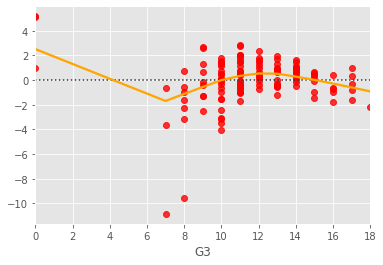

In [19]:
sns.residplot( 
    InteractedPortFeatureYTest
    , BestPortInteractionsTestPredict
    ,lowess=True
    , color="red"
    ,line_kws={'color':'orange'}
)

In [20]:
InteractedMathFeatureXTrain, InteractedMathFeatureXTest, InteractedMathFeatureYTrain, InteractedMathFeatureYTest = train_test_split(
    DFMathInteraction
    ,MathTarget
    ,test_size=0.2
)

In [21]:
MathInteractionSelector = SelectKBest(
    f_regression
    , k=13
)

MathInteractionSelector.fit(
    InteractedMathFeatureXTrain
    , InteractedMathFeatureYTrain
)
MathInteractionSelectorSelectedColumns = InteractedMathFeatureXTrain.columns[
    MathInteractionSelector.get_support()
]
list(MathInteractionSelectorSelectedColumns)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


['failures',
 'Fedu failures',
 'failures nursery',
 'failures goout',
 'failures health',
 'failures Pstatus_Together',
 'Fedu failures famrel',
 'Fedu failures freetime',
 'Fedu failures health',
 'failures nursery Pstatus_Together',
 'failures goout Pstatus_Together',
 'failures health Pstatus_Together',
 'failures nursery health Pstatus_Together']

In [22]:
LinearModelOnBestMathInteractedFeatures = LinearRegression()

#fit the linear regression to the data
LinearModelOnBestMathInteractedFeatures = LinearModelOnBestMathInteractedFeatures.fit(
    InteractedMathFeatureXTrain[MathInteractionSelectorSelectedColumns]
    , InteractedMathFeatureYTrain)

BestMathInteractionsYTrainPredictions = LinearModelOnBestMathInteractedFeatures.predict(
    InteractedMathFeatureXTrain[MathInteractionSelectorSelectedColumns]
)


BestMathInteractionsTrainRMSE = np.sqrt(
    metrics.mean_squared_error(
        InteractedMathFeatureYTrain
        , BestMathInteractionsYTrainPredictions
    )
)


print('Training Root Mean Squared Error:' , BestMathInteractionsTrainRMSE)

BestMathInteractionsTestPredict = LinearModelOnBestMathInteractedFeatures.predict(
    InteractedMathFeatureXTest[MathInteractionSelectorSelectedColumns]
)

BestMathInteractionsTestRMSE = np.sqrt(
    metrics.mean_squared_error(
        InteractedMathFeatureYTest
        , BestMathInteractionsTestPredict))

print('Testing Root Mean Squared Error:' , BestMathInteractionsTestRMSE)

Training Root Mean Squared Error: 4.186516868343692
Testing Root Mean Squared Error: 4.246061555565607


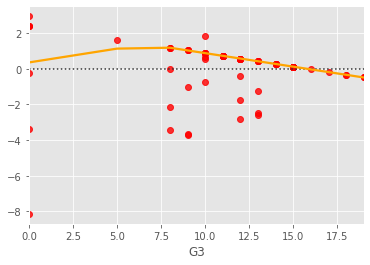

In [23]:
sns.residplot( 
    InteractedMathFeatureYTest
    , BestMathInteractionsTestPredict
    ,lowess=True
    , color="red"
    ,line_kws={'color':'orange'}
)

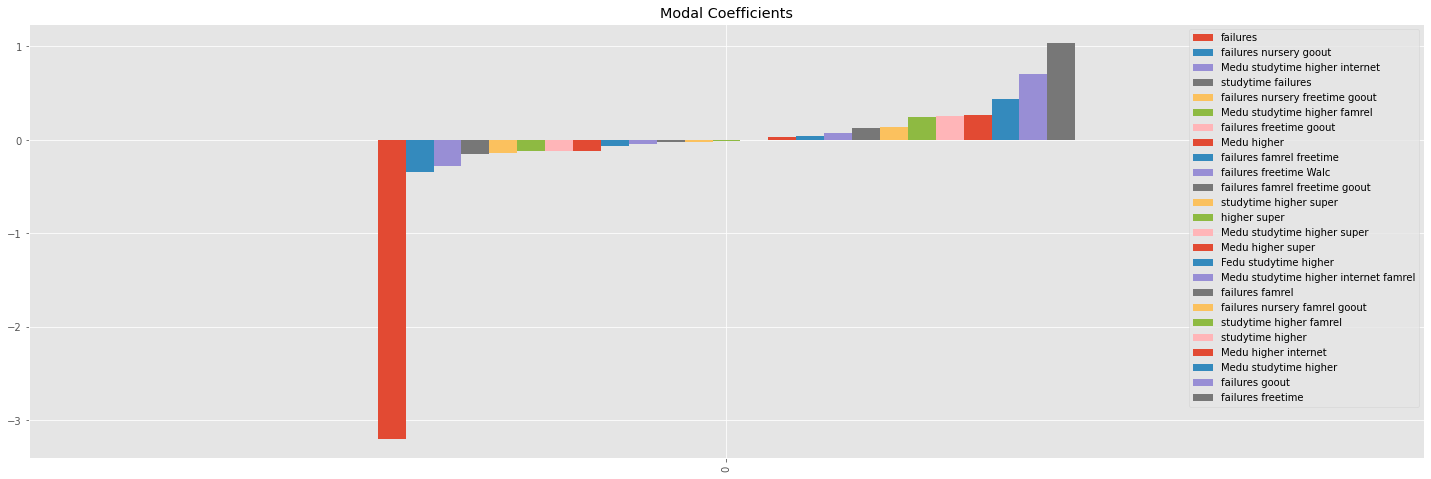

In [24]:
coef = pd.DataFrame(
    data=LinearModelOnBestPortInteractedFeatures.coef_ 
).T
coef.columns = PortInteractionSelectorSelectedColumns

model_coef = coef.T.sort_values(
    by=0
).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(25,8))

In [25]:
PortLasso = Lasso(alpha=0.1, normalize=False)

PortLasso.fit(
    InteractedPortFeatureXTrain[PortInteractionSelectorSelectedColumns]
    ,InteractedPortFeatureYTrain)

LassoInteractedPortFeatureYTrainPredict = PortLasso.predict(
    InteractedPortFeatureXTrain[PortInteractionSelectorSelectedColumns]

)
LassoInteractedPortFeatureYTestPredict = PortLasso.predict(
    InteractedPortFeatureXTest[PortInteractionSelectorSelectedColumns]
)

train_rmse_lasso01 = metrics.mean_absolute_error(
    InteractedPortFeatureYTrain
    , LassoInteractedPortFeatureYTrainPredict)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(
    InteractedPortFeatureYTest
    , LassoInteractedPortFeatureYTestPredict))
print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )


Training Error: 2.0304926893407274
Testing Error: 2.9891616197834665


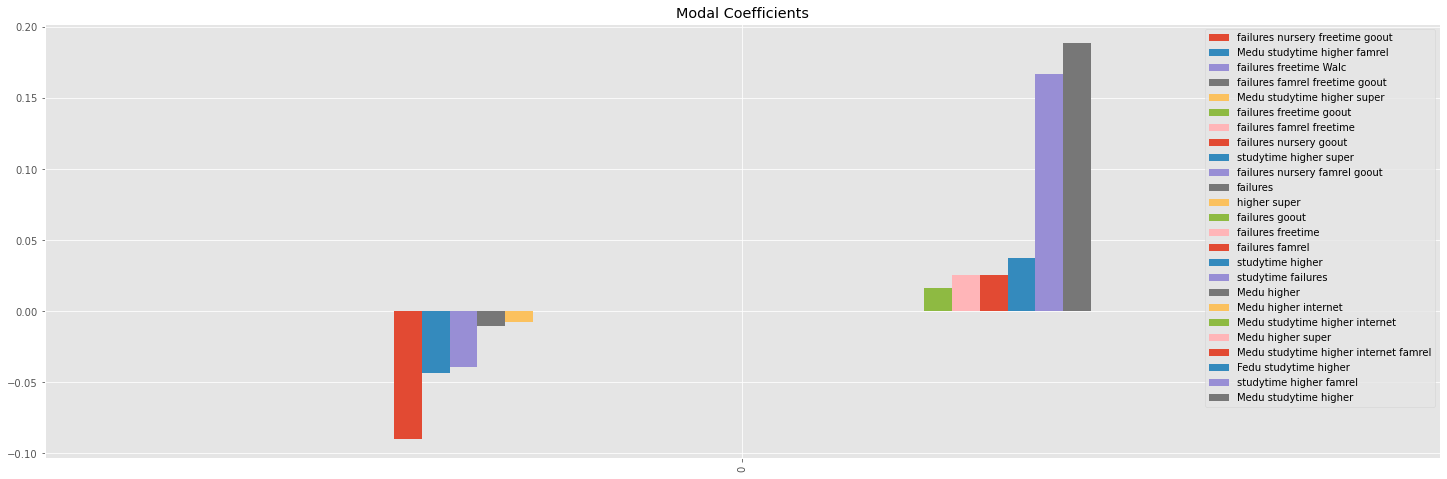

In [26]:
lasso_coef01 = pd.DataFrame(data=PortLasso.coef_).T
lasso_coef01.columns = InteractedPortFeatureXTrain[PortInteractionSelectorSelectedColumns].columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(25,8))

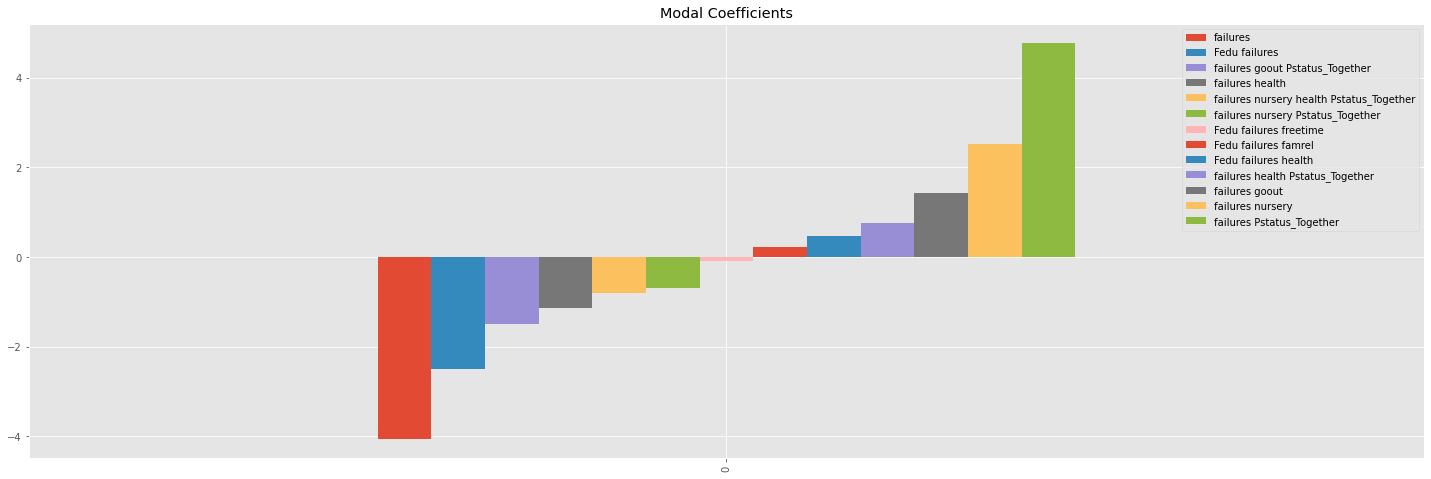

In [27]:
coef = pd.DataFrame(
    data=LinearModelOnBestMathInteractedFeatures.coef_ 
).T
coef.columns = MathInteractionSelectorSelectedColumns

model_coef = coef.T.sort_values(
    by=0
).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(25,8))

In [28]:
MathLasso = Lasso(alpha=0.1, normalize=False)

MathLasso.fit(
    InteractedMathFeatureXTrain[MathInteractionSelectorSelectedColumns]
    ,InteractedMathFeatureYTrain)

LassoInteractedMathFeatureYTrainPredict = MathLasso.predict(
    InteractedMathFeatureXTrain[MathInteractionSelectorSelectedColumns]

)
LassoInteractedMathFeatureYTestPredict = MathLasso.predict(
    InteractedMathFeatureXTest[MathInteractionSelectorSelectedColumns]
)

train_rmse_lasso02 = metrics.mean_absolute_error(
    InteractedMathFeatureYTrain
    , LassoInteractedMathFeatureYTrainPredict)
test_rmse_lasso02 = np.sqrt(metrics.mean_squared_error(
    InteractedMathFeatureYTest
    , LassoInteractedMathFeatureYTestPredict))
print('Training Error: '+ str(train_rmse_lasso02) )
print('Testing Error: '+ str(test_rmse_lasso02) )

Training Error: 3.192104295021362
Testing Error: 4.155962185015878


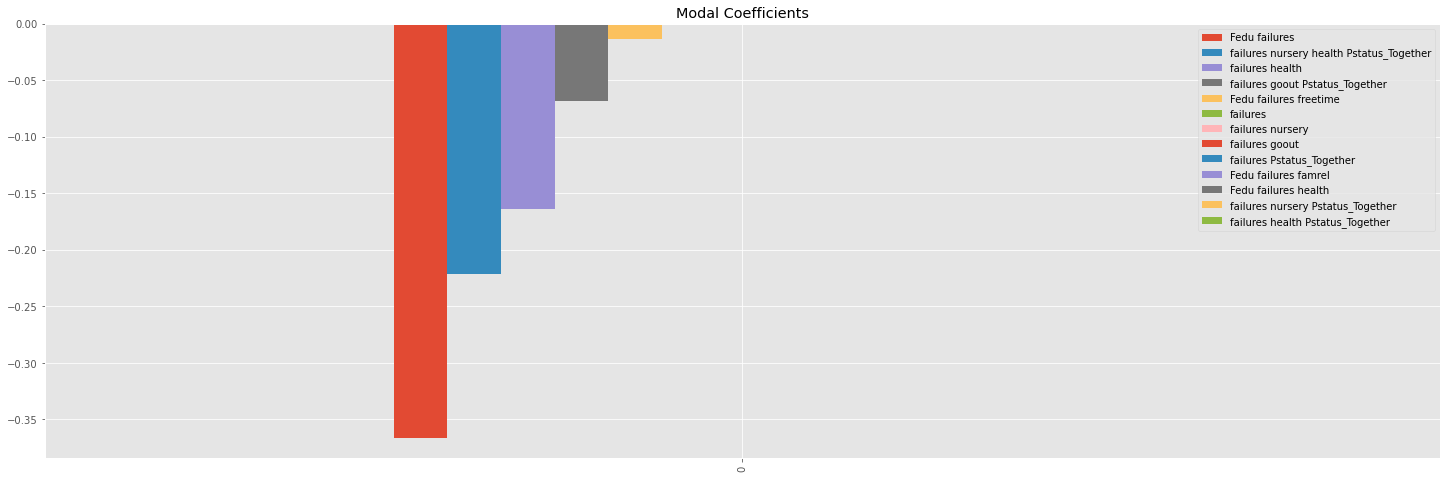

In [29]:
lasso_coef02 = pd.DataFrame(data=MathLasso.coef_).T
lasso_coef02.columns = InteractedMathFeatureXTrain[MathInteractionSelectorSelectedColumns].columns
lasso_coef02 = lasso_coef02.T.sort_values(by=0).T
lasso_coef02.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(25,8))

In [30]:
GeneralInteraction = PolynomialFeatures(
    degree=6
    ,interaction_only = True
    ,include_bias=False
       )
GeneralInteraction_data = GeneralInteraction.fit_transform(
    feats
)
GeneralInteractionColumns = GeneralInteraction.get_feature_names(
    feats.columns
)
DFInteraction = pd.DataFrame(
    GeneralInteraction_data
    , columns=GeneralInteractionColumns
)
DFInteraction.shape

(1044, 2391495)

In [31]:
PickedGeneralFeatureXTrain, PickedGeneralFeatureXTest, PickedGeneralFeatureYTrain, PickedGeneralFeatureYTest = train_test_split(
    PickedGeneralDf, GeneralTarget
    ,test_size=0.2
)


In [32]:
GeneralPickedScaler = StandardScaler()

# fit the scaler to the training data
GeneralPickedScaler.fit(PickedGeneralFeatureXTrain)

#transform the training data
PickedGeneralFeatureXTrain = pd.DataFrame(
    data=GeneralPickedScaler.transform
    (
    PickedGeneralFeatureXTrain
    )
    , columns=PickedGeneralDf.columns
)

#transform the testing dat
PickedGeneralFeatureXTest = pd.DataFrame(
    data=GeneralPickedScaler.transform
    (
        PickedGeneralFeatureXTest
    )
    , columns=PickedGeneralDf.columns
)

In [33]:
#instantiate a linear regression object
LinearModelOnGeneralPickedFeatures = LinearRegression()

#fit the linear regression to the data
LinearModelOnGeneralPickedFeatures = LinearModelOnGeneralPickedFeatures.fit(
    PickedGeneralFeatureXTrain,
    PickedGeneralFeatureYTrain
)

GeneralPickedYTrainPredictions = LinearModelOnGeneralPickedFeatures.predict(
    PickedGeneralFeatureXTrain
)

GeneralPickedTrainRMSE = np.sqrt(
    metrics.mean_squared_error(
        PickedGeneralFeatureYTrain
        , GeneralPickedYTrainPredictions
    )
)


print('Training Root Mean Squared Error:' 
      , GeneralPickedTrainRMSE
     )


Training Root Mean Squared Error: 3.7873299616747373


In [34]:
GeneralPickedYTestPredictions = LinearModelOnGeneralPickedFeatures.predict(
    PickedGeneralFeatureXTest
)

#evaluate the predictions on the test examples
GeneralPickedTestRMSE = np.sqrt(
    metrics.mean_squared_error(
    PickedGeneralFeatureYTest,
    GeneralPickedYTestPredictions
)
                   )

print('Testing Root Mean Squared Error:' 
      , GeneralPickedTestRMSE)


print('Training: ', GeneralPickedTrainRMSE
      ,"vs. Testing: ", GeneralPickedTestRMSE)




Testing Root Mean Squared Error: 3.215887272311616
Training:  3.7873299616747373 vs. Testing:  3.215887272311616


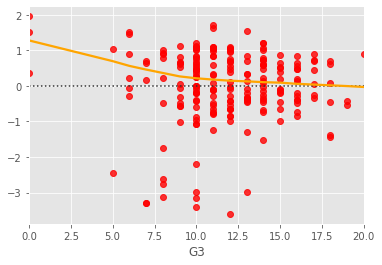

In [35]:
sns.residplot( 
    PickedGeneralFeatureYTest
    ,GeneralPickedYTestPredictions
    ,lowess=True
    ,color="red"
    ,line_kws={'color':'orange'}
)

In [36]:
InteractedGeneralFeatureXTrain, InteractedGeneralFeatureXTest, InteractedGeneralFeatureYTrain, InteractedGeneralFeatureYTest = train_test_split(
    DFInteraction, GeneralTarget
    ,test_size=0.2
)

In [37]:
GeneralInteractionSelector = SelectKBest(
    f_regression
    , k=33
)

GeneralInteractionSelector.fit(
    InteractedGeneralFeatureXTrain
    , InteractedGeneralFeatureYTrain
)
GeneralInteractionSelectorSelectedColumns = InteractedGeneralFeatureXTrain.columns[
    GeneralInteractionSelector.get_support()
]
list(GeneralInteractionSelectorSelectedColumns)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


['Medu studytime',
 'Medu higher',
 'studytime higher',
 'Medu studytime higher',
 'Medu studytime super',
 'Medu higher internet',
 'Medu higher famrel',
 'Medu higher address_type_Urban',
 'Medu higher super',
 'Medu Fedu studytime higher',
 'Medu Fedu higher internet',
 'Medu studytime higher internet',
 'Medu studytime higher famrel',
 'Medu studytime higher address_type_Urban',
 'Medu studytime higher super',
 'Medu studytime famrel super',
 'Medu higher internet famrel',
 'Medu higher famrel address_type_Urban',
 'Medu higher address_type_Urban super',
 'Fedu studytime higher internet',
 'Medu Fedu studytime higher internet',
 'Medu Fedu studytime higher famrel',
 'Medu studytime higher internet famrel',
 'Medu studytime higher internet address_type_Urban',
 'Medu studytime higher internet super',
 'Medu studytime higher famrel address_type_Urban',
 'Medu studytime higher famrel super',
 'Medu studytime higher address_type_Urban super',
 'Medu Fedu studytime higher internet famre

In [38]:
LinearModelOnBestGeneralInteractedFeatures = LinearRegression()

#fit the linear regression to the data
LinearModelOnBestGeneralInteractedFeatures = LinearModelOnBestGeneralInteractedFeatures.fit(
    InteractedGeneralFeatureXTrain[GeneralInteractionSelectorSelectedColumns]
    , InteractedGeneralFeatureYTrain)

BestGeneralInteractionsYTrainPredictions = LinearModelOnBestGeneralInteractedFeatures.predict(
    InteractedGeneralFeatureXTrain[GeneralInteractionSelectorSelectedColumns]
)


BestGeneralInteractionsTrainRMSE = np.sqrt(
    metrics.mean_squared_error(
        InteractedGeneralFeatureYTrain
        , BestGeneralInteractionsYTrainPredictions
    )
)


print('Training Root Mean Squared Error:' , BestGeneralInteractionsTrainRMSE)

BestGeneralInteractionsTestPredict = LinearModelOnBestGeneralInteractedFeatures.predict(
    InteractedGeneralFeatureXTest[GeneralInteractionSelectorSelectedColumns]
)

BestGeneralInteractionsTestRMSE = np.sqrt(
    metrics.mean_squared_error(
        InteractedGeneralFeatureYTest
        , BestGeneralInteractionsTestPredict))

print('Testing Root Mean Squared Error:' , BestGeneralInteractionsTestRMSE)





Training Root Mean Squared Error: 3.5211030528911764
Testing Root Mean Squared Error: 3.77681442780129


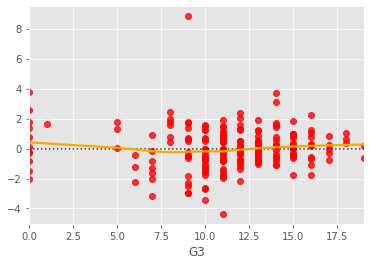

In [39]:
sns.residplot( 
    InteractedGeneralFeatureYTest
    ,BestGeneralInteractionsTestPredict
    ,lowess=True
    ,color="red"
    ,line_kws={'color':'orange'}
)

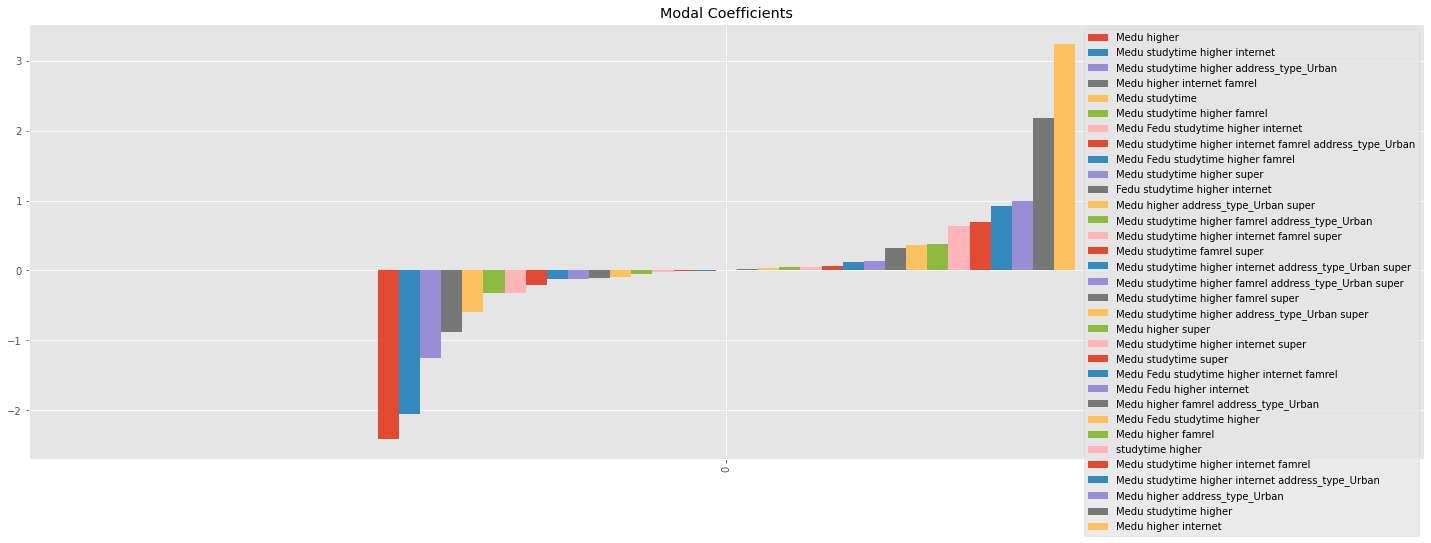

In [40]:
coef = pd.DataFrame(
    data=LinearModelOnBestGeneralInteractedFeatures.coef_ 
).T
coef.columns = GeneralInteractionSelectorSelectedColumns

model_coef = coef.T.sort_values(
    by=0
).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(25,8))

In [41]:
GeneralLasso = Lasso(alpha=0.1, normalize=False)

GeneralLasso.fit(
    InteractedGeneralFeatureXTrain[GeneralInteractionSelectorSelectedColumns]
    ,InteractedGeneralFeatureYTrain)

LassoInteractedGeneralFeatureYTrainPredict = GeneralLasso.predict(
    InteractedGeneralFeatureXTrain[GeneralInteractionSelectorSelectedColumns]

)
LassoInteractedGeneralFeatureYTestPredict = GeneralLasso.predict(
    InteractedGeneralFeatureXTest[GeneralInteractionSelectorSelectedColumns]
)

train_rmse_lasso01 = metrics.mean_absolute_error(
    InteractedGeneralFeatureYTrain
    , LassoInteractedGeneralFeatureYTrainPredict)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(
    InteractedGeneralFeatureYTest
    , LassoInteractedGeneralFeatureYTestPredict))
print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )


Training Error: 2.5676962418679845
Testing Error: 3.7076661939550077


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309.5101478718698, tolerance: 1.2428653892215569
  model = cd_fast.enet_coordinate_descent(


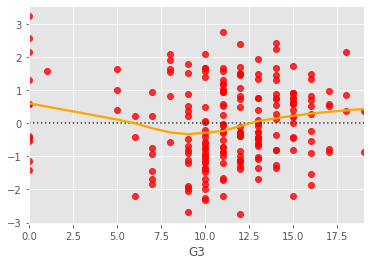

In [42]:
sns.residplot( 
    InteractedGeneralFeatureYTest
    ,LassoInteractedGeneralFeatureYTestPredict
    ,lowess=True
    ,color="red"
    ,line_kws={'color':'orange'}
)

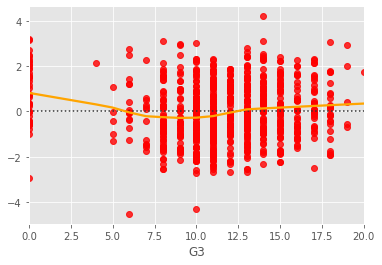

In [43]:
sns.residplot( 
    InteractedGeneralFeatureYTrain
    ,LassoInteractedGeneralFeatureYTrainPredict
    ,lowess=True
    ,color="red"
    ,line_kws={'color':'orange'}
)

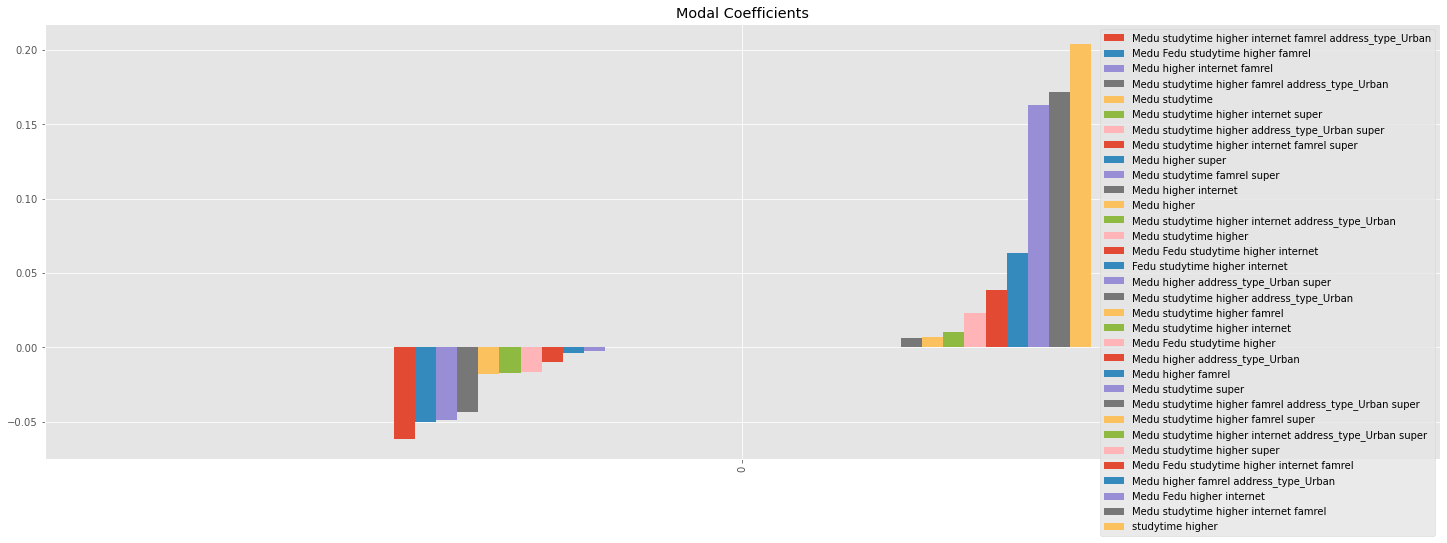

In [44]:
lasso_coef03 = pd.DataFrame(data=GeneralLasso.coef_).T
lasso_coef03.columns = InteractedGeneralFeatureXTrain[GeneralInteractionSelectorSelectedColumns].columns
lasso_coef03 = lasso_coef03.T.sort_values(by=0).T
lasso_coef03.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(25,8))

In [45]:
DFInteraction

Medu  Fedu  traveltime  studytime  schoolsup  famsup  activities  \
0      4.0   4.0         2.0        2.0        1.0     0.0         0.0   
1      1.0   1.0         1.0        2.0        0.0     1.0         0.0   
2      1.0   1.0         1.0        2.0        1.0     0.0         0.0   
3      4.0   2.0         1.0        3.0        0.0     1.0         1.0   
4      3.0   3.0         1.0        2.0        0.0     1.0         0.0   
...    ...   ...         ...        ...        ...     ...         ...   
1039   2.0   2.0         1.0        2.0        0.0     1.0         0.0   
1040   3.0   1.0         2.0        1.0        0.0     0.0         0.0   
1041   1.0   1.0         1.0        1.0        0.0     0.0         0.0   
1042   3.0   2.0         3.0        1.0        0.0     0.0         0.0   
1043   1.0   1.0         1.0        1.0        0.0     0.0         0.0   

      nursery  higher  internet  romantic  famrel  freetime  goout  Dalc  \
0         1.0     1.0       0.0       0.0     4.0       3.0    4.0   1.0   
1         0.0     1.0       1.0       0.0     5.0       3.0    3.0   1.0   
2         1.0     1.0       1.0       0.0     4.0       3.0    2.0   2.0   
3         1.0     1.0       1.0       1.0     3.0       2.0    2.0   1.0   
4         1.0     1.0       0.0       0.0     4.0       3.0    2.0   1.0   
...       ...     ...       ...       ...     ...       ...    ...   ...   
1039      1.0     1.0       0.0       0.0     5.0       5.0    4.0   4.0   
1040      0.0     1.0       1.0       0.0     2.0       4.0    5.0   3.0   
1041      0.0     1.0       0.0       0.0     5.0       5.0    3.0   3.0   
1042      0.0     1.0       1.0       0.0     4.0       4.0    1.0   3.0   
1043      1.0     1.0       1.0       0.0     3.0       2.0    3.0   3.0   

      Walc  health  absences  address_type_Urban  famsize_BIG_FAMILY  \
0      1.0     3.0       4.0                 1.0                 1.0   
1      1.0     3.0       2.0                 1.0                 1.0   
2      3.0     3.0       6.0                 1.0                 0.0   
3      1.0     5.0       0.0                 1.0                 1.0   
4      2.0     5.0       0.0                 1.0                 1.0   
...    ...     ...       ...                 ...                 ...   
1039   5.0     4.0      11.0                 1.0                 0.0   
1040   4.0     2.0       3.0                 1.0                 0.0   
1041   3.0     3.0       3.0                 0.0                 1.0   
1042   4.0     5.0       0.0                 0.0                 0.0   
1043   3.0     5.0       5.0                 1.0                 0.0   

      Pstatus_Together  Mjob_at_home  Mjob_health  Mjob_services  \
0                  0.0           1.0          0.0            0.0   
1                  1.0           1.0          0.0            0.0   
2                  1.0           1.0          0.0            0.0   
3                  1.0           0.0          1.0            0.0   
4                  1.0           0.0          0.0            0.0   
...                ...           ...          ...            ...   
1039               0.0           0.0          0.0            1.0   
1040               1.0           0.0          0.0            1.0   
1041               1.0           0.0          0.0            0.0   
1042               1.0           0.0          0.0            1.0   
1043               1.0           0.0          0.0            0.0   

      Mjob_teacher  Fjob_at_home  Fjob_health  Fjob_services  Fjob_teacher  \
0              0.0           0.0          0.0            0.0           1.0   
1              0.0           0.0          0.0            0.0           0.0   
2              0.0           0.0          0.0            0.0           0.0   
3              0.0           0.0          0.0            1.0           0.0   
4              0.0           0.0          0.0            0.0           0.0   
...            ...           ...          ...         

In [46]:
FinalLasso = Lasso(alpha=0.1, normalize=False)

FinalLasso.fit(
    DFInteraction[GeneralInteractionSelectorSelectedColumns]
    ,GeneralTarget)

LassoInteractedFinalFeatureYTrainPredict = FinalLasso.predict(
    DFInteraction[GeneralInteractionSelectorSelectedColumns]

)
train_rmse_lasso01 = metrics.mean_absolute_error(
    GeneralTarget
    , LassoInteractedFinalFeatureYTrainPredict
)
print('Training Error: '+ str(train_rmse_lasso01) )



Training Error: 2.576603419498023


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 616.9278444701376, tolerance: 1.5578922413793104
  model = cd_fast.enet_coordinate_descent(


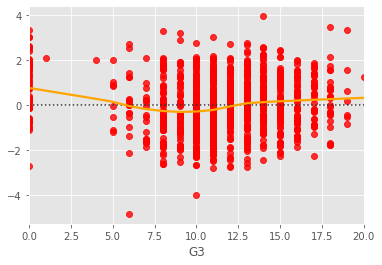

In [47]:
sns.residplot( 
    GeneralTarget
    ,LassoInteractedFinalFeatureYTrainPredict
    ,lowess=True
    ,color="red"
    ,line_kws={'color':'orange'}
)

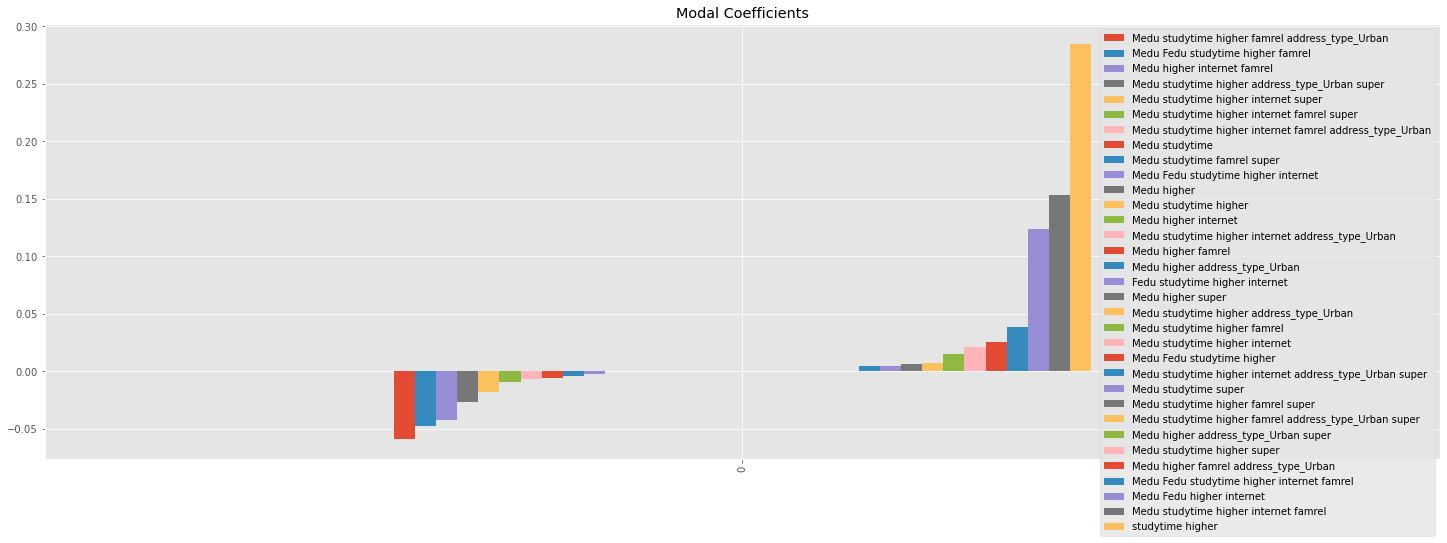

In [48]:
lasso_coef4 = pd.DataFrame(data=FinalLasso.coef_).T
lasso_coef4.columns = DFInteraction[GeneralInteractionSelectorSelectedColumns].columns
lasso_coef4 = lasso_coef4.T.sort_values(by=0).T
lasso_coef4.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(25,8))

In [49]:
lasso_coef4 = pd.DataFrame(data=FinalLasso.coef_)
list(zip(list(DFInteraction[GeneralInteractionSelectorSelectedColumns].columns),list(FinalLasso.coef_)))

[('Medu studytime', -0.005365268706308966),
 ('Medu higher', 0.0),
 ('studytime higher', 0.2850449087238287),
 ('Medu studytime higher', 0.0),
 ('Medu studytime super', 0.005090348742548056),
 ('Medu higher internet', 0.0),
 ('Medu higher famrel', -0.0),
 ('Medu higher address_type_Urban', 0.0),
 ('Medu higher super', -0.0),
 ('Medu Fedu studytime higher', -0.0),
 ('Medu Fedu higher internet', 0.12389275644285924),
 ('Medu studytime higher internet', 0.0),
 ('Medu studytime higher famrel', 0.0),
 ('Medu studytime higher address_type_Urban', 0.0),
 ('Medu studytime higher super', 0.02109659105283425),
 ('Medu studytime famrel super', -0.003826195653704835),
 ('Medu higher internet famrel', -0.0421193638568701),
 ('Medu higher famrel address_type_Urban', 0.025644287785791108),
 ('Medu higher address_type_Urban super', 0.015556521745643214),
 ('Fedu studytime higher internet', 0.0),
 ('Medu Fedu studytime higher internet', -0.0018590591318127106),
 ('Medu Fedu studytime higher famrel', -0

In [50]:
GeneralInteractionSelector = SelectKBest(
    f_regression
    , k=1000
)

GeneralInteractionSelector.fit(
    InteractedGeneralFeatureXTrain
    , InteractedGeneralFeatureYTrain
)
GeneralInteractionSelectorSelectedColumns = InteractedGeneralFeatureXTrain.columns[
    GeneralInteractionSelector.get_support()
]
list(GeneralInteractionSelectorSelectedColumns)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


['Medu',
 'higher',
 'super',
 'Medu Fedu',
 'Medu studytime',
 'Medu higher',
 'Medu internet',
 'Medu famrel',
 'Medu address_type_Urban',
 'Medu super',
 'Fedu studytime',
 'Fedu higher',
 'studytime higher',
 'studytime internet',
 'studytime super',
 'higher internet',
 'higher famrel',
 'higher address_type_Urban',
 'higher super',
 'address_type_Urban super',
 'Medu Fedu studytime',
 'Medu Fedu higher',
 'Medu Fedu internet',
 'Medu Fedu address_type_Urban',
 'Medu Fedu super',
 'Medu studytime nursery',
 'Medu studytime higher',
 'Medu studytime internet',
 'Medu studytime famrel',
 'Medu studytime freetime',
 'Medu studytime address_type_Urban',
 'Medu studytime Pstatus_Together',
 'Medu studytime reason_reputation',
 'Medu studytime super',
 'Medu nursery higher',
 'Medu nursery internet',
 'Medu nursery address_type_Urban',
 'Medu nursery super',
 'Medu higher internet',
 'Medu higher famrel',
 'Medu higher freetime',
 'Medu higher address_type_Urban',
 'Medu higher Pstatus_

In [51]:
FinalLasso = Lasso(alpha=0.1, normalize=False)

FinalLasso.fit(
    DFInteraction[GeneralInteractionSelectorSelectedColumns]
    ,GeneralTarget)

LassoInteractedFinalFeatureYTrainPredict = FinalLasso.predict(
    DFInteraction[GeneralInteractionSelectorSelectedColumns]

)
train_rmse_lasso5 = metrics.mean_absolute_error(
    GeneralTarget
    , LassoInteractedFinalFeatureYTrainPredict
)
print('Training Error: '+ str(train_rmse_lasso5) )



Training Error: 2.1498432052656136


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4932.412202618322, tolerance: 1.5578922413793104
  model = cd_fast.enet_coordinate_descent(


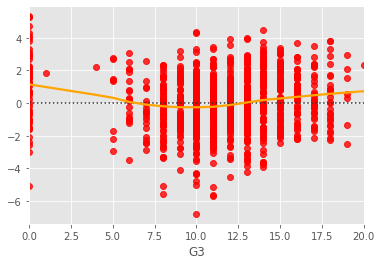

In [52]:
sns.residplot( 
    GeneralTarget
    ,LassoInteractedFinalFeatureYTrainPredict
    ,lowess=True
    ,color="red"
    ,line_kws={'color':'orange'}
)

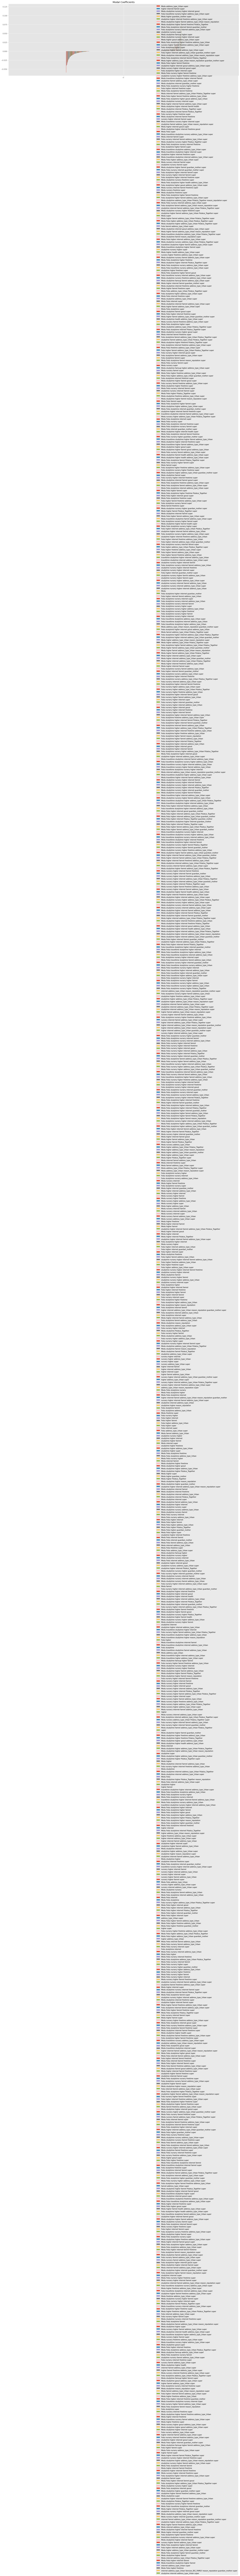

In [53]:
lasso_coef5 = pd.DataFrame(data=FinalLasso.coef_).T
lasso_coef5.columns = DFInteraction[GeneralInteractionSelectorSelectedColumns].columns
lasso_coef5 = lasso_coef5.T.sort_values(by=0).T
lasso_coef5.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(25,8))

In [54]:
coefdf=list(zip(list(DFInteraction[GeneralInteractionSelectorSelectedColumns].columns),list(FinalLasso.coef_)))

In [55]:
coefdf=pd.DataFrame(data = coefdf,columns=['Frature','Coef'])
feats

Medu  Fedu  traveltime  studytime  schoolsup  famsup  activities  \
0       4     4           2          2          1       0           0   
1       1     1           1          2          0       1           0   
2       1     1           1          2          1       0           0   
3       4     2           1          3          0       1           1   
4       3     3           1          2          0       1           0   
..    ...   ...         ...        ...        ...     ...         ...   
390     2     2           1          2          0       1           0   
391     3     1           2          1          0       0           0   
392     1     1           1          1          0       0           0   
393     3     2           3          1          0       0           0   
394     1     1           1          1          0       0           0   

     nursery  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  \
0          1       1         0         0       4         3      4     1     1   
1          0       1         1         0       5         3      3     1     1   
2          1       1         1         0       4         3      2     2     3   
3          1       1         1         1       3         2      2     1     1   
4          1       1         0         0       4         3      2     1     2   
..       ...     ...       ...       ...     ...       ...    ...   ...   ...   
390        1       1         0         0       5         5      4     4     5   
391        0       1         1         0       2         4      5     3     4   
392        0       1         0         0       5         5      3     3     3   
393        0       1         1         0       4         4      1     3     4   
394        1       1         1         0       3         2      3     3     3   

     health  absences  address_type_Urban  famsize_BIG_FAMILY  \
0         3         4                   1                   1   
1         3         2                   1                   1   
2         3         6                   1                   0   
3         5         0                   1                   1   
4         5         0                   1                   1   
..      ...       ...                 ...                 ...   
390       4        11                   1                   0   
391       2         3                   1                   0   
392       3         3                   0                   1   
393       5         0                   0                   0   
394       5         5                   1                   0   

     Pstatus_Together  Mjob_at_home  Mjob_health  Mjob_services  Mjob_teacher  \
0                   0             1            0              0             0   
1                   1             1            0              0             0   
2                   1             1            0              0             0   
3                   1             0            1              0             0   
4                   1             0            0              0             0   
..                ...           ...          ...            ...           ...   
390                 0             0            0              1             0   
391                 1             0            0              1             0   
392                 1             0            0              0             0   
393                 1             0            0              1             0   
394                 1             0            0              0             0   

     Fjob_at_home  Fjob_health  Fjob_services  Fjob_teacher  reason_course  \
0               0            0              0             1              1   
1               0            0              0             0              1   
2               0            0              0             0              0   
3               0            0              1             0              0   
4          

In [56]:
LassoPicked = list(coefdf[(coefdf['Coef']>0.03)|(coefdf['Coef']<-0.03)]['Frature'])
LassoPickedGeneralDf=DFInteraction[ LassoPicked ]



In [57]:
LassoPickedXTrain, LassoPickedXTest, LassoPickedYTrain, LassoPickedFeatureYTest = train_test_split(
    LassoPickedGeneralDf, GeneralTarget
    ,test_size=0.2
)

In [58]:
LassoPickedScaler = StandardScaler()

# fit the scaler to the training data
LassoPickedScaler.fit(LassoPickedGeneralDf)

#transform the training data
LassoPickedXTrain = pd.DataFrame(
    data=LassoPickedScaler.transform
    (
    LassoPickedXTrain
    )
    , columns=LassoPickedGeneralDf.columns
)

#transform the testing dat
LassoPickedXTest = pd.DataFrame(
    data=LassoPickedScaler.transform
    (
        LassoPickedXTest
    )
    , columns=LassoPickedGeneralDf.columns
)


LinearModelOnLassoPicked = LinearRegression()

#fit the linear regression to the data
LinearModelOnLassoPicked = LinearModelOnLassoPicked.fit(
    LassoPickedXTrain,
    LassoPickedYTrain
)

LassoPickedYTrainPredictions = LinearModelOnLassoPicked.predict(
    LassoPickedXTrain
)

LassoPickedTrainRMSE = np.sqrt(
    metrics.mean_squared_error(
        LassoPickedYTrain
        , LassoPickedYTrainPredictions
    )
)


print('Training Root Mean Squared Error:' 
      , LassoPickedTrainRMSE
     )


Training Root Mean Squared Error: 3.5340021772135444
